In [1]:
# analyze the state increment from DA in FV3
# temporary used for single cycle DA experiment: 06/28/2024
# modified: 2024/08/21 - modify the code for the single-cycle experiments
# modified: 2025/02/04 - modify for varbc sensitivity experiment

In [1]:
import numpy as np
import os
import matplotlib
import matplotlib.pyplot as plt
import netCDF4 as nc
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import cartopy
print(cartopy.__version__)

0.21.1


In [2]:
#datahome = '/scratch2/GFDL/gfdlscr/Chih-Chi.Hu/single_cycle_VarBC_sens_exp/state_space/increment'
#datahome = '/scratch2/GFDL/gfdlscr/Chih-Chi.Hu/single_cycle_VarBC_sens_exp_v2/state_space/increment'
datahome = '/scratch2/GFDL/gfdlscr/Chih-Chi.Hu/single_cycle_VarBC_sens_exp_v3/state_space/increment'

'''
expids = ['ctrl','bc_amsua_1','bc_amsua_2','bc_amsua_3','bc_amsua_4','bc_amsua_5','bc_amsua_15', \
                 'ng_amsua_1','ng_amsua_2','ng_amsua_3','ng_amsua_4','ng_amsua_5','ng_amsua_15', \
                 'bc_atms_17','bc_atms_18','bc_atms_19','bc_atms_20','bc_atms_21','bc_atms_22',  \
                 'ng_atms_17','ng_atms_18','ng_atms_19','ng_atms_20','ng_atms_21','ng_atms_22']
'''

#expids = ['CTRL','amsua_ch1', 'amsua_ch2', 'amsua_ch3', 'amsua_ch4', 'amsua_ch5', 'amsua_ch15']
#expids = ['CTRL','atms_ch17', 'atms_ch18', 'atms_ch19', 'atms_ch20', 'atms_ch21', 'atms_ch22']
#expids = ['CTRL', 'full_clr_cld', 'allskychannel','multichannel']
expids = ['CTRL', 'full_clr_cld', 'full_clr_cld_low','full_sym_clwnbc','full_sym_tri_clwnbc']

if 'v2' in datahome:
    single_cycle_tag = '2022073100'
elif 'v3' in datahome:
    single_cycle_tag = '2022062506'
else:
    single_cycle_tag = '2022070106'


ncfile = []
for exp in expids:
    ncfile.append(os.path.join(datahome,f'atminc_{exp}.nc'))
print(ncfile)

['/scratch2/GFDL/gfdlscr/Chih-Chi.Hu/single_cycle_VarBC_sens_exp_v3/state_space/increment/atminc_CTRL.nc', '/scratch2/GFDL/gfdlscr/Chih-Chi.Hu/single_cycle_VarBC_sens_exp_v3/state_space/increment/atminc_full_clr_cld.nc', '/scratch2/GFDL/gfdlscr/Chih-Chi.Hu/single_cycle_VarBC_sens_exp_v3/state_space/increment/atminc_full_clr_cld_low.nc', '/scratch2/GFDL/gfdlscr/Chih-Chi.Hu/single_cycle_VarBC_sens_exp_v3/state_space/increment/atminc_full_sym_clwnbc.nc', '/scratch2/GFDL/gfdlscr/Chih-Chi.Hu/single_cycle_VarBC_sens_exp_v3/state_space/increment/atminc_full_sym_tri_clwnbc.nc']


In [3]:
T={}; HUM={}; LW={}; U={}; V={};

for i,exp in enumerate(expids):
    print(f'processing {exp} ...')
    fn = nc.Dataset(ncfile[i])
    lon   = fn.variables['lon'][:]
    lat   = fn.variables['lat'][:]
    lev   = fn.variables['lev'][:]
    T[exp]   = fn.variables['T_inc'][:]       # temperature
    HUM[exp] = fn.variables['sphum_inc'][:]   # specific humidity
    U[exp]   = fn.variables['u_inc'][:]       # U wind
    V[exp]   = fn.variables['v_inc'][:]       # V wind
    fn.close()

processing CTRL ...
processing full_clr_cld ...
processing full_clr_cld_low ...
processing full_sym_clwnbc ...
processing full_sym_tri_clwnbc ...


In [4]:
pfull = np.array([ 0.6608309, 1.378903, 2.252838, 3.225348, 4.255341, 5.330372, \
    6.456353, 7.655193, 8.959935, 10.41395, 12.05274, 13.89211, 15.94824, \
    18.23763, 20.777, 23.58316, 26.67296, 30.06311, 33.77012, 37.81014, \
    42.19892, 46.95163, 52.08276, 57.60604, 63.53439, 69.87972, 76.65289, \
    83.86366, 91.52061, 99.63107, 108.2011, 117.2354, 126.7373, 136.7088, \
    147.1505, 158.0616, 169.4399, 181.2818, 193.5825, 206.3358, 219.5342, \
    233.1691, 247.2307, 261.708, 276.5892, 291.8613, 307.5107, 323.5227, \
    339.882, 356.5724, 373.5775, 390.88, 408.4624, 426.3068, 444.3951, \
    462.7087, 481.2289, 499.937, 518.8147, 537.8431, 557.0037, 576.2781, \
    595.6483, 615.0961, 634.6042, 654.1553, 673.6653, 693.0355, 712.2211, \
    731.1763, 749.855, 768.211, 786.1975, 803.7682, 820.8767, 837.4772, \
    853.5246, 868.9745, 883.7838, 897.9103, 911.3136, 923.9548, 935.7968, \
    946.8046, 956.9453, 966.1885, 974.5061, 981.8727, 988.266, 993.6661, \
    998.0573]) ;


In [5]:
# zonal mean
zonal_mean_T={}; zonal_mean_HUM={};

for exp in expids:
    zonal_mean_T[exp]   = np.mean(T[exp],axis=2)
    zonal_mean_HUM[exp] = np.mean(HUM[exp],axis=2)*1e3

lats, levs = np.meshgrid(lat, pfull)

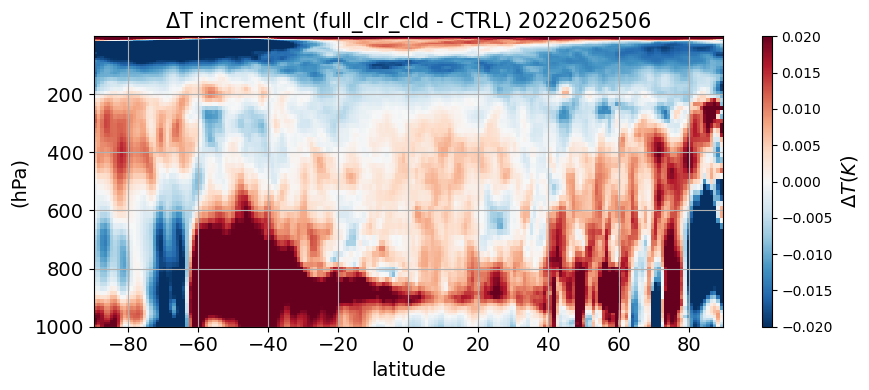

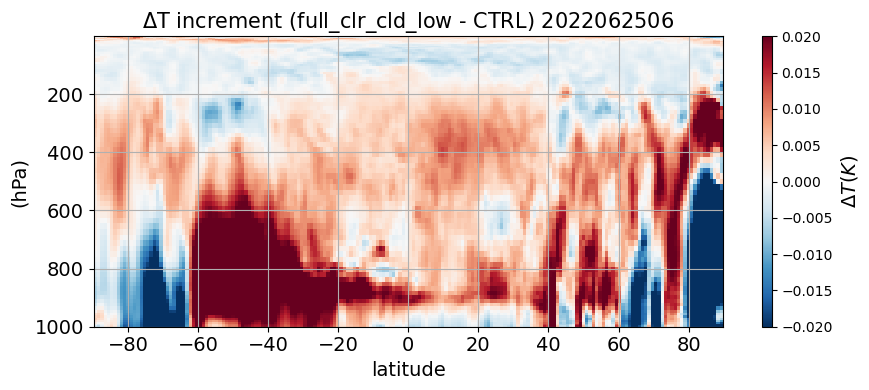

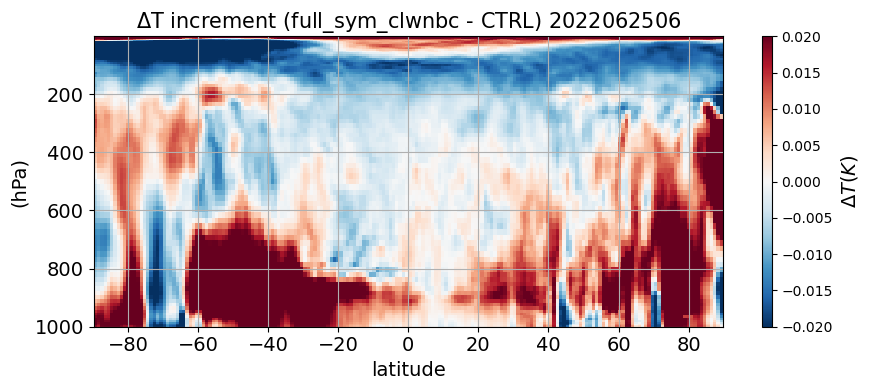

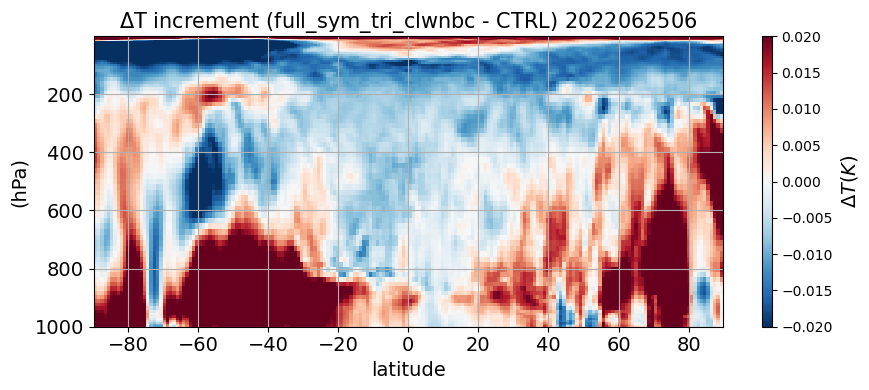

In [16]:
### zonal mean difference for Temperature:
save_fig = True

if 'amsua_ch1' in expids:
    v_min = -0.02 
    v_max =  0.02
else: # for ATMS channels
    v_min = -0.001 
    v_max =  0.001
    
v_min = -0.02 
v_max =  0.02

fig_dir = f'/home/Chih-Chi.Hu/python_codes/figures/single_cycle_VarBC_sens_exp/T/'

if not os.path.exists(fig_dir):
    os.makedirs(fig_dir)
    print(f"Directory '{fig_dir}' created.")
    
    
expref  = 'CTRL'
#expref = 'full_clr_cld'
#expref = expids[0]
exp_pltlist = [exp for exp in expids if exp != expref]



for exptest in exp_pltlist:
    zonal_mean_vars = {};

    plt_cont_var=zonal_mean_T[exptest]-zonal_mean_T[expref]

    fig, ax = plt.subplots(figsize=(9,4))

    contour1=ax.pcolormesh(lats, levs, plt_cont_var, cmap='RdBu_r', vmin=v_min, vmax=v_max)


    ax.set_ylim(ax.get_ylim()[::-1])
    ax.set_xlabel('latitude',fontsize=14)
    ax.set_ylabel('(hPa)',fontsize=14)
    ax.tick_params(axis='x', labelsize=14)  # Set the size to 14 points
    ax.tick_params(axis='y', labelsize=14)  # Set the size to 14 points
    ax.grid(True)
    ax.set_title(rf'$\Delta$T increment ({exptest} - {expref}) {single_cycle_tag}',fontsize=15)

    cbar = fig.colorbar(contour1,location='right',aspect=30)
    cbar.set_label('$\Delta T(K)$', fontsize=14)
    plt.tight_layout()

    if save_fig:
        plt.savefig(f"{fig_dir}/dT_zonal_mean_{exptest}_{single_cycle_tag}_ref_{expref}.png")
    plt.show()

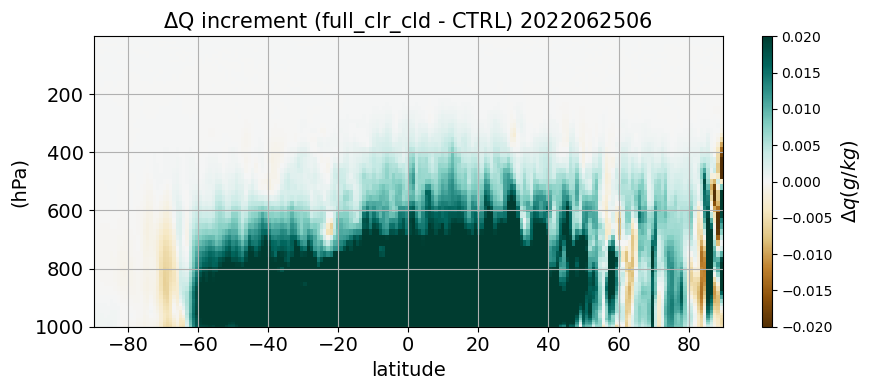

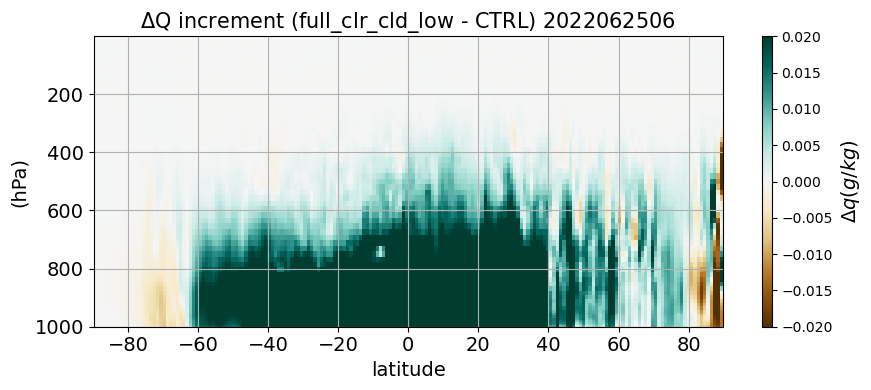

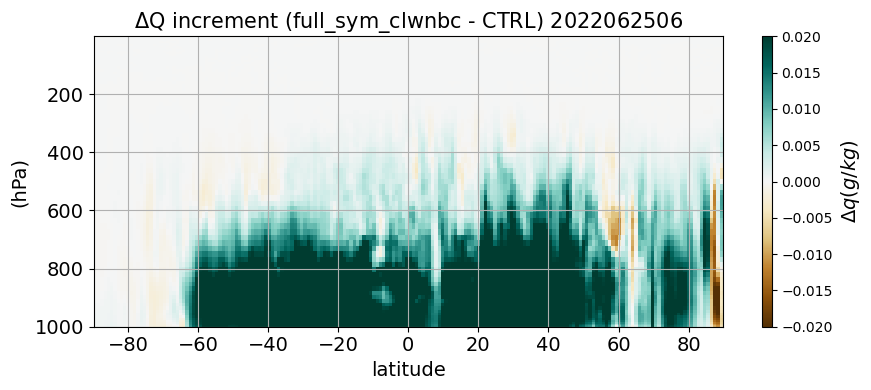

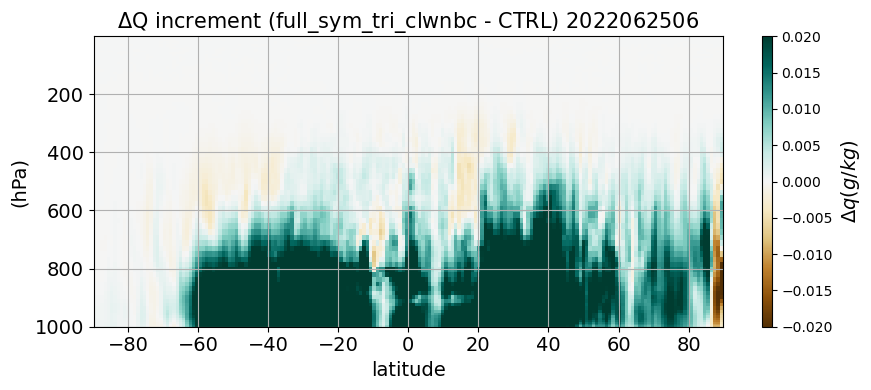

In [15]:
### zonal mean difference for Humidity:
save_fig = True

if 'amsua_ch1' in expids:
    v_min = -0.02 
    v_max =  0.02
else: # for upper level humidity channels
    v_min = -0.001
    v_max =  0.001

v_min = -0.02
v_max =  0.02 
    
fig_dir = f'/home/Chih-Chi.Hu/python_codes/figures/single_cycle_VarBC_sens_exp/HUM/'

if not os.path.exists(fig_dir):
    os.makedirs(fig_dir)
    print(f"Directory '{fig_dir}' created.")
    
    

#expref  = 'full_clr_cld'
expref = 'CTRL'
#expref = expids[0]

exp_pltlist = [exp for exp in expids if exp != expref]

for exptest in exp_pltlist:
    zonal_mean_vars = {};

    plt_cont_var=zonal_mean_HUM[exptest]-zonal_mean_HUM[expref]

    fig, ax = plt.subplots(figsize=(9,4))

    contour1=ax.pcolormesh(lats, levs, plt_cont_var, cmap='BrBG', vmin=v_min, vmax=v_max)


    ax.set_ylim(ax.get_ylim()[::-1])
    ax.set_xlabel('latitude',fontsize=14)
    ax.set_ylabel('(hPa)',fontsize=14)
    ax.tick_params(axis='x', labelsize=14)  # Set the size to 14 points
    ax.tick_params(axis='y', labelsize=14)  # Set the size to 14 points
    ax.grid(True)
    ax.set_title(rf'$\Delta$Q increment ({exptest} - {expref}) {single_cycle_tag}',fontsize=15)

    cbar = fig.colorbar(contour1,location='right',aspect=30)
    cbar.set_label('$\Delta q (g/kg)$', fontsize=14)

    plt.tight_layout()

    if save_fig:
        plt.savefig(f"{fig_dir}/dQ_zonal_mean_{exptest}_{single_cycle_tag}_ref_{expref}.png")
    plt.show()

In [20]:
# check the correspondence between indices and heig
for i,ll in enumerate(pfull):
    print(f"{i} : {ll} (hPa)")

0 : 0.6608309 (hPa)
1 : 1.378903 (hPa)
2 : 2.252838 (hPa)
3 : 3.225348 (hPa)
4 : 4.255341 (hPa)
5 : 5.330372 (hPa)
6 : 6.456353 (hPa)
7 : 7.655193 (hPa)
8 : 8.959935 (hPa)
9 : 10.41395 (hPa)
10 : 12.05274 (hPa)
11 : 13.89211 (hPa)
12 : 15.94824 (hPa)
13 : 18.23763 (hPa)
14 : 20.777 (hPa)
15 : 23.58316 (hPa)
16 : 26.67296 (hPa)
17 : 30.06311 (hPa)
18 : 33.77012 (hPa)
19 : 37.81014 (hPa)
20 : 42.19892 (hPa)
21 : 46.95163 (hPa)
22 : 52.08276 (hPa)
23 : 57.60604 (hPa)
24 : 63.53439 (hPa)
25 : 69.87972 (hPa)
26 : 76.65289 (hPa)
27 : 83.86366 (hPa)
28 : 91.52061 (hPa)
29 : 99.63107 (hPa)
30 : 108.2011 (hPa)
31 : 117.2354 (hPa)
32 : 126.7373 (hPa)
33 : 136.7088 (hPa)
34 : 147.1505 (hPa)
35 : 158.0616 (hPa)
36 : 169.4399 (hPa)
37 : 181.2818 (hPa)
38 : 193.5825 (hPa)
39 : 206.3358 (hPa)
40 : 219.5342 (hPa)
41 : 233.1691 (hPa)
42 : 247.2307 (hPa)
43 : 261.708 (hPa)
44 : 276.5892 (hPa)
45 : 291.8613 (hPa)
46 : 307.5107 (hPa)
47 : 323.5227 (hPa)
48 : 339.882 (hPa)
49 : 356.5724 (hPa)
50 : 373.5775

In [47]:
lons, lats = np.meshgrid(lon,lat)

In [ ]:
# 2D Map Plot for Temperature:

#selected_levs = [57, 62, 67, 73, 76, 79, 81, 84, 86, 90]
selected_levs = [39, 46, 57, 67, 76, 81, 86, 90]
save_fig = True

vmin = -0.1
vmax =  0.1

fig_dir = f'/home/Chih-Chi.Hu/python_codes/figures/single_cycle_VarBC_sens_exp/T/Map/'

if not os.path.exists(fig_dir):
    os.makedirs(fig_dir)
    print(f"Directory '{fig_dir}' created.")


expref  = 'CTRL'
exp_pltlist = [exp for exp in expids if exp != expref]

for exptest in exp_pltlist:
    
    for i in selected_levs:
        
        tmp_lev_pres = int(pfull[i])
        
        fig, ax = plt.subplots(subplot_kw={'projection': ccrs.PlateCarree()},figsize=(12,9))

        # ax1: bias in the reference experiment
        #plt_field = np.squeeze(HUM[exptest][i,:,:]-HUM[expref][i,:,:])*1e3
        plt_field = np.squeeze(T[exptest][i,:,:]-T[expref][i,:,:])

        #contour1 = ax.pcolormesh(lons, lats, plt_field, cmap='BrBG', vmin=vmin, vmax=vmax)
        contour1 = ax.pcolormesh(lons, lats, plt_field, cmap='RdBu_r', vmin=vmin, vmax=vmax)

        cbar = plt.colorbar(contour1, ax=ax, extend='both', orientation='vertical', shrink=0.45) # Adjust the shrink parameter as needed
        gl = ax.gridlines(draw_labels=True)
        ax.coastlines()  # Add coastlines
        gl.top_labels = False
        gl.right_labels = False
        gl.xformatter = LONGITUDE_FORMATTER
        gl.yformatter = LATITUDE_FORMATTER

        ax.set_title(rf"$\Delta$T ({exptest} - {expref}) at {tmp_lev_pres}(hPa) {single_cycle_tag}",fontsize=16)
        plt.tight_layout()
        
        if save_fig:
            plt.savefig(f"{fig_dir}/dT_{tmp_lev_pres}hPa_{exptest}_{single_cycle_tag}.png")
        plt.show()

In [ ]:
# 2D Map Plot for Humidity:

#selected_levs = [57, 62, 67, 73, 76, 79, 81, 84, 86, 90]
#selected_levs = [67, 76, 81, 86, 90]

# for upper level humidity sensitive channels
selected_levs = [39, 46, 57, 67, 76, 81]

save_fig = True

#vmin = -0.1
#vmax =  0.1

# for upper level humidity sensitive channels
vmin = -0.02
vmax =  0.02

fig_dir = f'/home/Chih-Chi.Hu/python_codes/figures/single_cycle_VarBC_sens_exp/HUM/Map/'

if not os.path.exists(fig_dir):
    os.makedirs(fig_dir)
    print(f"Directory '{fig_dir}' created.")


expref  = 'CTRL'
exp_pltlist = [exp for exp in expids if exp != expref]

for exptest in exp_pltlist:
    
    for i in selected_levs:
        
        tmp_lev_pres = int(pfull[i])
        
        fig, ax = plt.subplots(subplot_kw={'projection': ccrs.PlateCarree()},figsize=(12,9))

        # ax1: bias in the reference experiment
        plt_field = np.squeeze(HUM[exptest][i,:,:]-HUM[expref][i,:,:])*1e3

        contour1 = ax.pcolormesh(lons, lats, plt_field, cmap='BrBG', vmin=vmin, vmax=vmax)

        cbar = plt.colorbar(contour1, ax=ax, extend='both', orientation='vertical', shrink=0.45) # Adjust the shrink parameter as needed
        gl = ax.gridlines(draw_labels=True)
        ax.coastlines()  # Add coastlines
        gl.top_labels = False
        gl.right_labels = False
        gl.xformatter = LONGITUDE_FORMATTER
        gl.yformatter = LATITUDE_FORMATTER

        ax.set_title(rf"$\Delta$Q ({exptest} - {expref}) at {tmp_lev_pres}(hPa) {single_cycle_tag}",fontsize=16)
        plt.tight_layout()
        
        if save_fig:
            plt.savefig(f"{fig_dir}/dQ_{tmp_lev_pres}hPa_{exptest}_{single_cycle_tag}.png")
        plt.show()

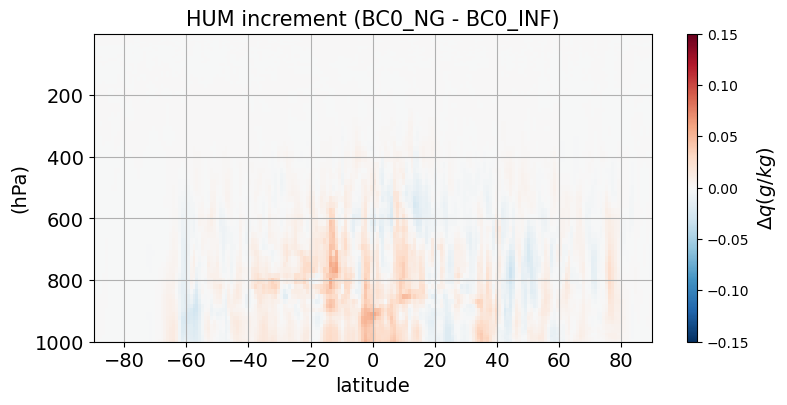

In [14]:
### zonal mean plot
pltvars = 'HUM'

if pltvars == 'T':
    plt_levs = np.linspace(-0.1, 0.1, 21)
elif pltvars == 'HUM':
    plt_levs = np.linspace(-9, 9, 21)*1e-2

zonal_mean_vars = {};

for exp in expids:
    if pltvars == 'T':
        zonal_mean_vars[exp] = np.mean(T[exp],axis=2)
        v_min = -0.15
        v_max =  0.15
    elif pltvars == 'HUM':
        zonal_mean_vars[exp] = np.mean(HUM[exp],axis=2)*1e3
        v_min = -0.15
        v_max =  0.15
        
lats, levs = np.meshgrid(lat, pfull)

#plt_cont_var = zonal_mean_vars[expref]
plt_cont_var=zonal_mean_vars[exptest]-zonal_mean_vars[expref]

fig, ax = plt.subplots(figsize=(9,4))
#contour1=ax.contourf(lats, levs, plt_cont_var, cmap='RdBu_r', levels=plt_levs)
contour1=ax.pcolormesh(lats, levs, plt_cont_var, cmap='RdBu_r', vmin=v_min, vmax=v_max)

ax.set_ylim(ax.get_ylim()[::-1])
ax.set_xlabel('latitude',fontsize=14)
ax.set_ylabel('(hPa)',fontsize=14)
ax.tick_params(axis='x', labelsize=14)  # Set the size to 14 points
ax.tick_params(axis='y', labelsize=14)  # Set the size to 14 points
ax.grid(True)
ax.set_title(f'{pltvars} increment ({exptest} - {expref})',fontsize=15)
#ax.set_title(f'{pltvars} increment ({expref})',fontsize=15)

cbar = fig.colorbar(contour1,location='right',aspect=30)
if pltvars == 'T':
    cbar.set_label('$\Delta T(K)$', fontsize=14)
elif pltvars == 'HUM':
    cbar.set_label('$\Delta q (g/kg)$', fontsize=14)

plt.savefig(f'{pltvars}_inc_{exptest}_minus_{expref}.png', dpi=200, bbox_inches='tight')


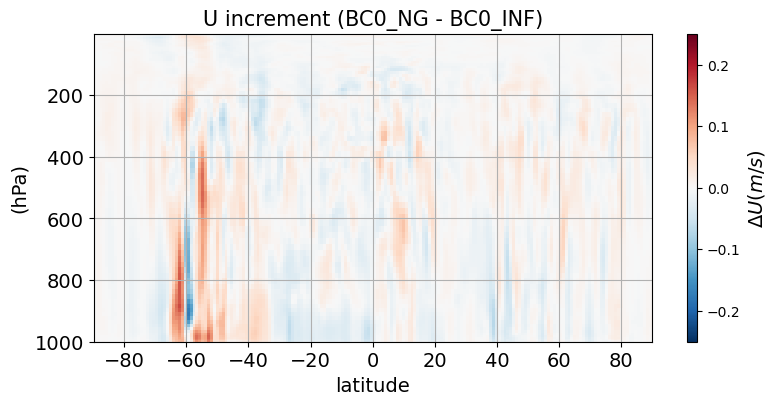

In [15]:
### zonal mean plot
pltvars = 'U'

zonal_mean_vars = {};

for exp in expids:
    if pltvars == 'T':
        zonal_mean_vars[exp] = np.mean(T[exp],axis=2)
        v_min = -0.15
        v_max =  0.15
    elif pltvars == 'HUM':
        zonal_mean_vars[exp] = np.mean(HUM[exp],axis=2)*1e3
        v_min = -0.15
        v_max =  0.15
    elif pltvars == 'U':
        zonal_mean_vars[exp] = np.mean(U[exp],axis=2)
        v_min = -0.25
        v_max =  0.25
        
lats, levs = np.meshgrid(lat, pfull)

#plt_cont_var = zonal_mean_vars[expref]
plt_cont_var=zonal_mean_vars[exptest]-zonal_mean_vars[expref]

fig, ax = plt.subplots(figsize=(9,4))
#contour1=ax.contourf(lats, levs, plt_cont_var, cmap='RdBu_r', levels=plt_levs)
contour1=ax.pcolormesh(lats, levs, plt_cont_var, cmap='RdBu_r', vmin=v_min, vmax=v_max)

ax.set_ylim(ax.get_ylim()[::-1])
ax.set_xlabel('latitude',fontsize=14)
ax.set_ylabel('(hPa)',fontsize=14)
ax.tick_params(axis='x', labelsize=14)  # Set the size to 14 points
ax.tick_params(axis='y', labelsize=14)  # Set the size to 14 points
ax.grid(True)
ax.set_title(f'{pltvars} increment ({exptest} - {expref})',fontsize=15)
#ax.set_title(f'{pltvars} increment ({expref})',fontsize=15)

cbar = fig.colorbar(contour1,location='right',aspect=30)
if pltvars == 'T':
    cbar.set_label('$\Delta T(K)$', fontsize=14)
elif pltvars == 'HUM':
    cbar.set_label('$\Delta q (g/kg)$', fontsize=14)
elif pltvars == 'U':
    cbar.set_label('$\Delta U (m/s)$', fontsize=14)
    
plt.savefig(f'{pltvars}_inc_{exptest}_minus_{expref}.png', dpi=200, bbox_inches='tight')

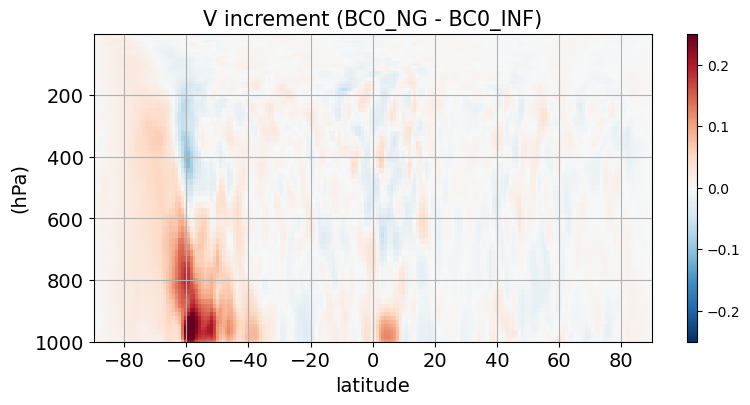

In [16]:
### zonal mean plot
pltvars = 'V'

zonal_mean_vars = {};

for exp in expids:
    if pltvars == 'T':
        zonal_mean_vars[exp] = np.mean(T[exp],axis=2)
        v_min = -0.15
        v_max =  0.15
    elif pltvars == 'HUM':
        zonal_mean_vars[exp] = np.mean(HUM[exp],axis=2)*1e3
        v_min = -0.15
        v_max =  0.15
    elif pltvars == 'V':
        zonal_mean_vars[exp] = np.mean(V[exp],axis=2)
        v_min = -0.25
        v_max =  0.25
        
lats, levs = np.meshgrid(lat, pfull)

#plt_cont_var = zonal_mean_vars[expref]
plt_cont_var=zonal_mean_vars[exptest]-zonal_mean_vars[expref]

fig, ax = plt.subplots(figsize=(9,4))
#contour1=ax.contourf(lats, levs, plt_cont_var, cmap='RdBu_r', levels=plt_levs)
contour1=ax.pcolormesh(lats, levs, plt_cont_var, cmap='RdBu_r', vmin=v_min, vmax=v_max)

ax.set_ylim(ax.get_ylim()[::-1])
ax.set_xlabel('latitude',fontsize=14)
ax.set_ylabel('(hPa)',fontsize=14)
ax.tick_params(axis='x', labelsize=14)  # Set the size to 14 points
ax.tick_params(axis='y', labelsize=14)  # Set the size to 14 points
ax.grid(True)
ax.set_title(f'{pltvars} increment ({exptest} - {expref})',fontsize=15)
#ax.set_title(f'{pltvars} increment ({expref})',fontsize=15)

cbar = fig.colorbar(contour1,location='right',aspect=30)
if pltvars == 'T':
    cbar.set_label('$\Delta T(K)$', fontsize=14)
elif pltvars == 'HUM':
    cbar.set_label('$\Delta q (g/kg)$', fontsize=14)
elif pltvars == 'U':
    cbar.set_label('$\Delta V (m/s)$', fontsize=14)
    
plt.savefig(f'{pltvars}_inc_{exptest}_minus_{expref}.png', dpi=200, bbox_inches='tight')

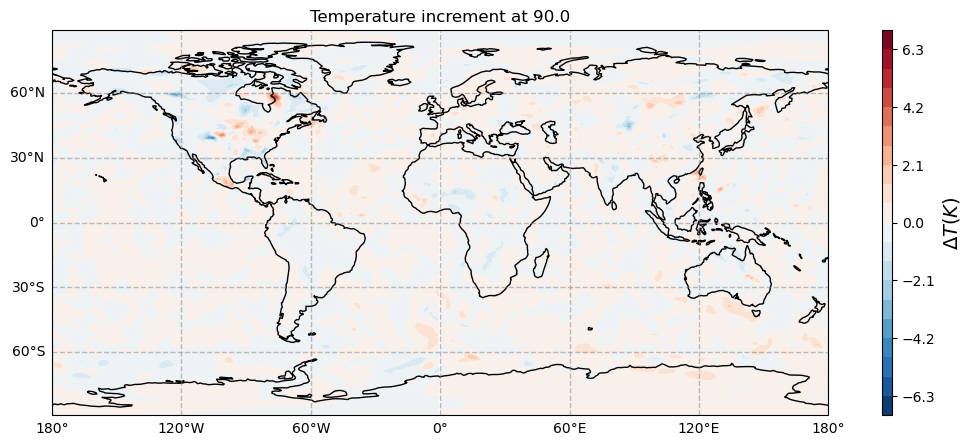

In [6]:
plt_levs = np.linspace(-7,7,21)

fig = plt.figure(figsize=(14,5))

# define the subplots
ax = fig.add_subplot(projection=ccrs.PlateCarree())  # Add subplot at position 1

i=89
# ax1: CTRL bias
ax.coastlines()
plt_vars = T['CTRL'][i,:,:]
contour1 = ax.contourf(lon, lat, plt_vars, cmap='RdBu_r', levels=plt_levs)
ax.set_xlabel('longitude')
ax.set_ylabel('latitude') 
ax.set_title(f'Temperature increment at {lev[i]}')
gl = ax.gridlines(draw_labels=True, linewidth=1, color='gray', alpha=0.5, linestyle='--')
gl.top_labels = False  # Hide labels on the top side
gl.right_labels = False  # Hide labels on the right side

# set colorbar
cbar = fig.colorbar(contour1,location='right',aspect=40)
#cbar.set_ticks([-6,-4,-2,0,2,4,6])  # Set the tick positions
#cbar.set_ticklabels(['Low', 'Medium', 'Medium-High', 'High', 'Very High'])  # Set the tick labels
cbar.set_label('$\Delta T(K)$', fontsize=14)

TypeError: unhashable type: 'slice'

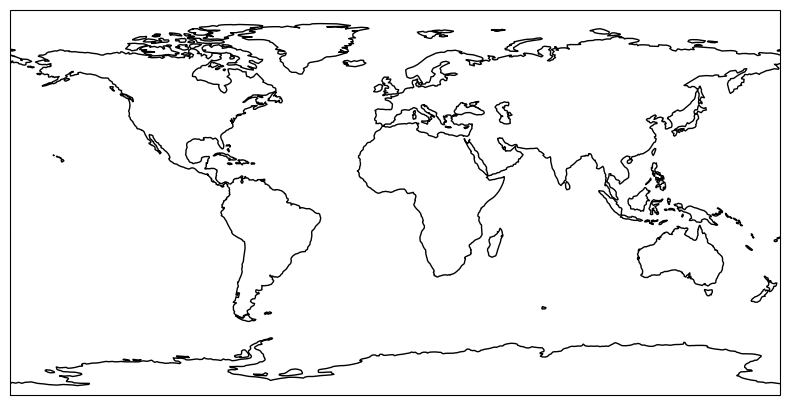

In [7]:
# plot the increment in each level

for i in (10,20,30,40,50,60,70,80,90):
#for i in range(len(lev)):
    plt_levs = np.linspace(-7,7,21)*1e-9

    fig = plt.figure(figsize=(14,5))

    # define the subplots
    ax = fig.add_subplot(projection=ccrs.PlateCarree())  # Add subplot at position 1

    # ax1: CTRL bias
    ax.coastlines()
    plt_vars = LW[i,:,:]
    contour1 = ax.contourf(lon, lat, plt_vars, cmap='RdBu_r', levels=plt_levs)
    ax.set_xlabel('longitude')
    ax.set_ylabel('latitude') 
    ax.set_title(f'Temperature increment at {lev[i]}')
    gl = ax.gridlines(draw_labels=True, linewidth=1, color='gray', alpha=0.5, linestyle='--')
    gl.top_labels = False  # Hide labels on the top side
    gl.right_labels = False  # Hide labels on the right side

    # set colorbar
    cbar = fig.colorbar(contour1,location='right',aspect=40)
    #cbar.set_ticks([-6,-4,-2,0,2,4,6])  # Set the tick positions
    #cbar.set_ticklabels(['Low', 'Medium', 'Medium-High', 'High', 'Very High'])  # Set the tick labels
    cbar.set_label('$\Delta T(K)$', fontsize=14)

In [50]:
plt_levs

array([-7.0e-06, -6.3e-06, -5.6e-06, -4.9e-06, -4.2e-06, -3.5e-06,
       -2.8e-06, -2.1e-06, -1.4e-06, -7.0e-07,  0.0e+00,  7.0e-07,
        1.4e-06,  2.1e-06,  2.8e-06,  3.5e-06,  4.2e-06,  4.9e-06,
        5.6e-06,  6.3e-06,  7.0e-06])

In [71]:
np.max(LW)

0.0